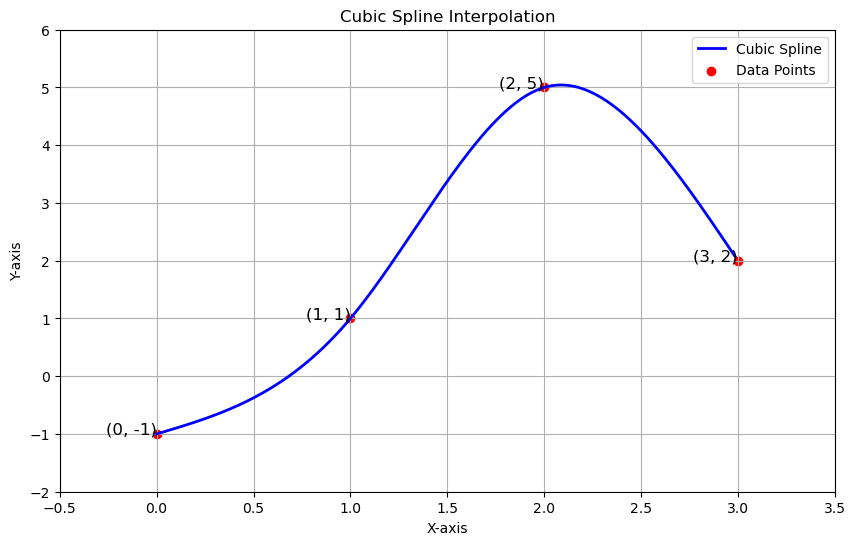

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Expr]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1]))

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]

        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)

    splines.reverse()
    return splines, xs

# Puntos
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines, xs_sorted = cubic_spline(xs, ys)

# Evaluar spline
x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

x_sym = sym.Symbol("x")

for i in range(len(xs_sorted) - 1):
    mask = (x_vals >= xs_sorted[i]) & (x_vals <= xs_sorted[i + 1])
    f = sym.lambdify(x_sym, splines[i], modules="numpy")
    y_vals[mask] = f(x_vals[mask])

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], color='blue', lw=2, label='Cubic Spline')
points = ax.scatter(xs, ys, color='red', label='Data Points')

# Etiquetas
for (x, y) in zip(xs, ys):
    ax.text(x, y, f'({x}, {y})', fontsize=12, ha='right')

# Ajustar límites automáticamente con margen
x_margin = 0.5
y_margin = 1.0
ax.set_xlim(min(xs) - x_margin, max(xs) + x_margin)
ax.set_ylim(min(ys) - y_margin, max(ys) + y_margin)

ax.set_title('Cubic Spline Interpolation')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid()
ax.legend()

# Función de animación
def animate(i):
    line.set_data(x_vals[:i], y_vals[:i])
    return line,

# Configuración de la animación
anim = FuncAnimation(
    fig,
    animate,
    frames=len(x_vals),
    interval=20,
    blit=True
)

# Guardar la animación
anim.save(
    'cubic_spline_grafica3.gif',
    writer='pillow',
    fps=30,
    dpi=100
)

plt.show()